# 1. Classification

Presentation of some algorithms. We will here use some classifiers commonly used. The classifiers we compare here are the following :
- [The K-Nearest Neighbors (KNN) Classifier](#1.1-K-Nearest-Neighbors)
- [Support Vector Machine (SVM)](#1.2-Support-Vector-Machine)
- [Gaussian Process Classifier](#1.3-Gaussian-Process-Classifier)
- [Decision Tree Classifier](#1.4-Decision-Tree-Classifier)
- [Random Forest Classifier](#1.5-Random-Forest-Classifier)
- [The Ada Boost Classifier](#1.6-Ada-Boost-Classifier)
- [Naive Bayes Classifier](#1.7-Naive-Bayes-Classifier)


## 1.1 K-Nearest Neighbors
...

## 1.2 Support Vector Machine
...

## 1.3 Gaussian Process Classifier
...

## 1.4 Decision Tree Classifier
...

## 1.5 Random Forest Classifier
...

## 1.6 Ada Boost Classifier
...

## 1.7 Naive Bayes Classifier
...

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [4]:
from lblearn.datasets import load_galaxies
from sklearn.metrics import accuracy_score, confusion_matrix

galaxies = load_galaxies(n_samples=50)

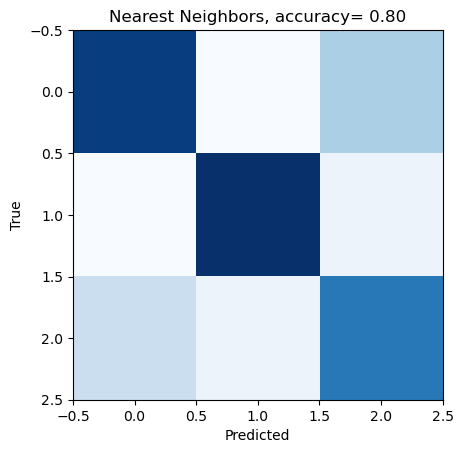

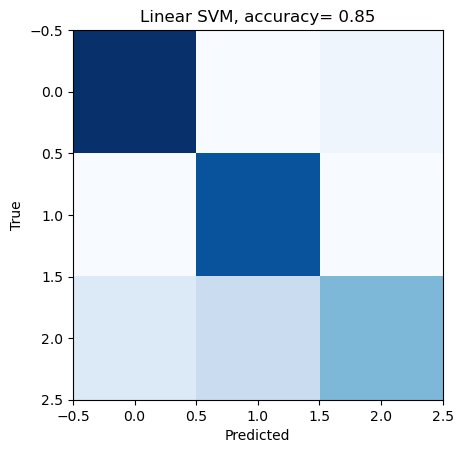

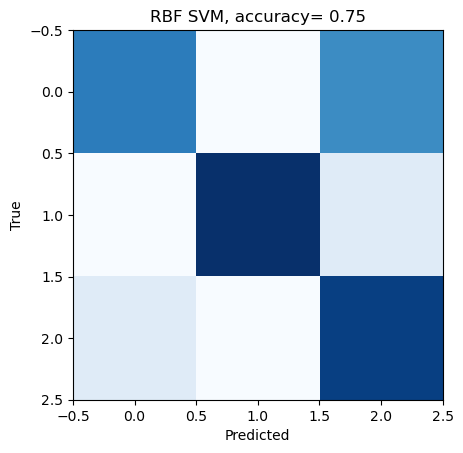

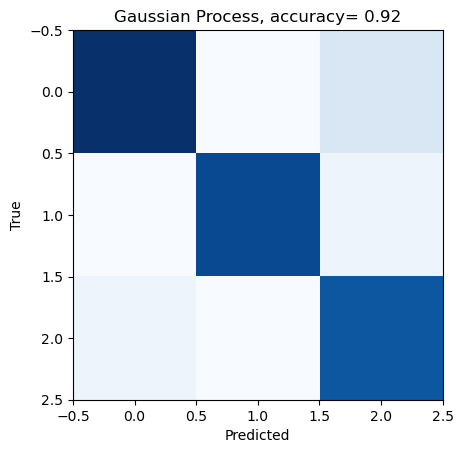

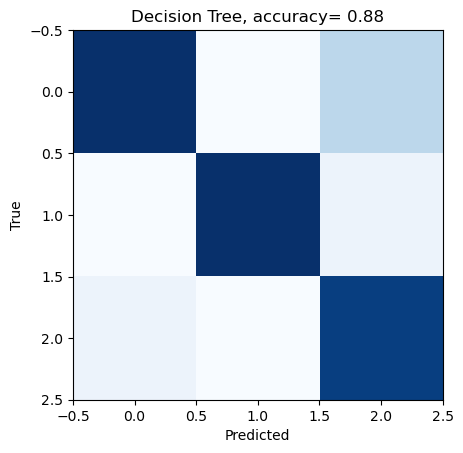

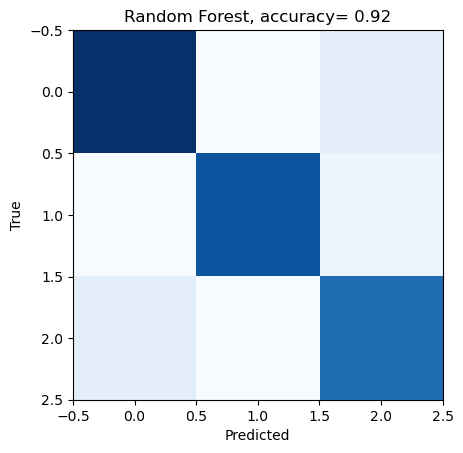

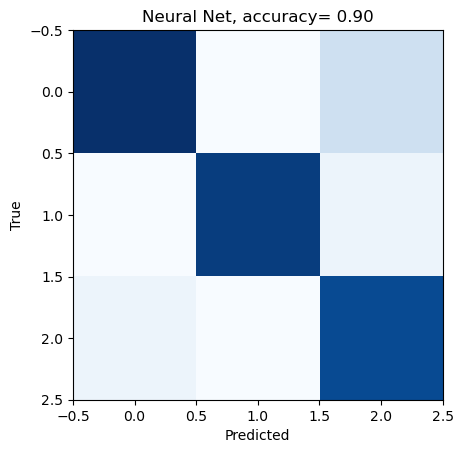

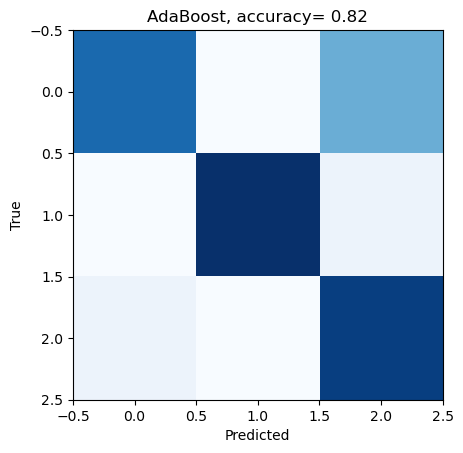

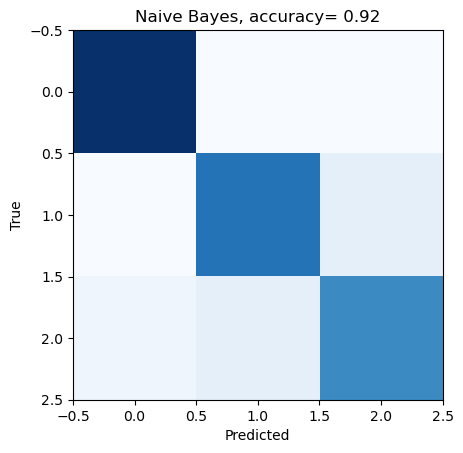

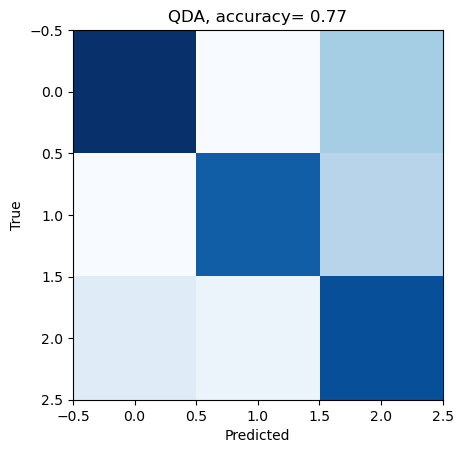

In [7]:
# preprocess dataset, split into training and test part
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for name, clf in zip(names, classifiers):
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    plt.figure()
    plt.title(f"{name}, accuracy={score: .2f}")
    plt.imshow(confusion_matrix(y_test, y_pred),cmap='Blues', interpolation='nearest')
    plt.grid(False)
    plt.ylabel('True')
    plt.xlabel('Predicted');

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix,[11] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature.[12] The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"), and identical sets of "classes" in both dimensions (each combination of dimension and class is a variable in the contingency table).

/var/folders/t9/37s2572n4y1bwsj0j2rb1zrm0000gn/T/ipykernel_9443/253768459.py:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


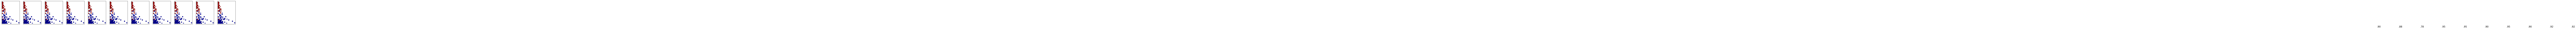

In [16]:
figure = plt.figure(figsize=(27, 9))
i = 1
x_index = 5
y_index = 7
# preprocess dataset, split into training and test part
X, y = galaxies.data, galaxies.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, x_index], X_train[:, y_index], c=y_train, cmap=cm_bright, edgecolors="k")
# Plot the testing points
ax.scatter(
    X_test[:, x_index], X_test[:, y_index], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
)
#ax.set_xlim(x_min, x_max)
#ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
i += 1

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    #DecisionBoundaryDisplay.from_estimator(
        #clf, X[:, 2:4], cmap=cm, alpha=0.8, ax=ax, eps=0.5
    #)

    # Plot the training points
    ax.scatter(
        X_train[:, x_index], X_train[:, y_index], c=y_train, cmap=cm_bright, edgecolors="k"
    )
    # Plot the testing points
    ax.scatter(
        X_test[:, x_index],
        X_test[:, y_index],
        c=y_test,
        cmap=cm_bright,
        edgecolors="k",
        alpha=0.6,
    )

    #ax.set_xlim(x_min, x_max)
    #ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(
        x_max - 0.3,
        y_min + 0.3,
        ("%.2f" % score).lstrip("0"),
        size=15,
        horizontalalignment="right",
    )
    i += 1

plt.tight_layout()
plt.show()